In [112]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [113]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X= torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
len(X), len(y)
X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
len(X_train), len(X_test)

(80, 20)

In [115]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    plt.scatter(test_data, test_labels, c="r", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop={"size":14})

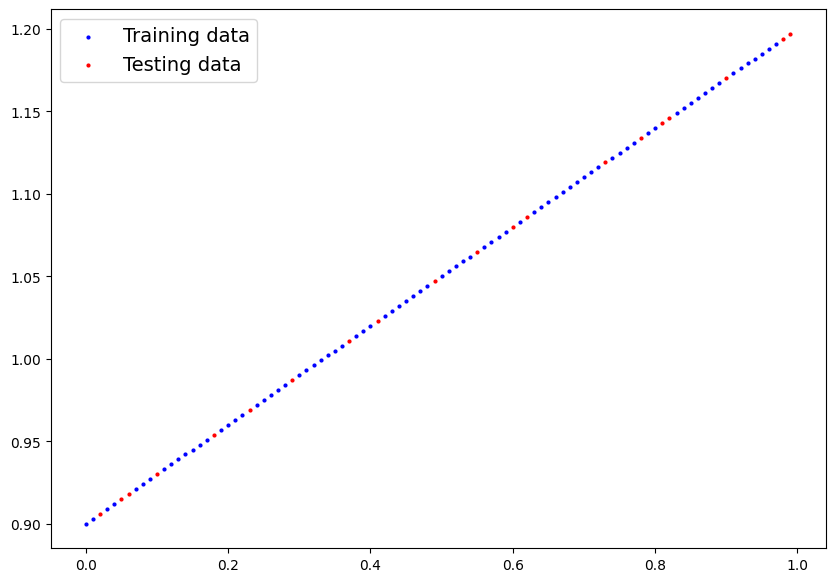

In [116]:
plot_predictions()

In [117]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        #self.weights = nn.Parameter(torch.randn(1,
         #                                       requires_grad=True,
          #                                      dtype=torch.float))
        
        #self.bias = nn.Parameter(torch.randn(1,
         #                                       requires_grad=True,
          #                                      dtype=torch.float))

        self.layer = nn.Linear(in_features=1,
                               out_features=1)
        
    def forward(self, x):
        #return self.weights * x + self.bias
        return self.layer(x)

In [118]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('layer.weight', tensor([[-0.7617]])),
             ('layer.bias', tensor([-0.0808]))])

In [119]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [120]:
epochs = 300

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 20 == 0:
        model_0.eval()

        with torch.inference_mode():
            test_pred = model_0(X_test)

            test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 1.505236029624939 | Test loss: 1.498079538345337
Epoch: 20 | Loss: 1.2564290761947632 | Test loss: 1.2487785816192627
Epoch: 40 | Loss: 1.007622241973877 | Test loss: 0.9994775652885437
Epoch: 60 | Loss: 0.7588152885437012 | Test loss: 0.750176727771759
Epoch: 80 | Loss: 0.5100082159042358 | Test loss: 0.5008755922317505
Epoch: 100 | Loss: 0.2625400722026825 | Test loss: 0.25450408458709717
Epoch: 120 | Loss: 0.13125978410243988 | Test loss: 0.14584481716156006
Epoch: 140 | Loss: 0.09984148293733597 | Test loss: 0.11463122069835663
Epoch: 160 | Loss: 0.08834996819496155 | Test loss: 0.1006356030702591
Epoch: 180 | Loss: 0.07892999053001404 | Test loss: 0.08959417045116425
Epoch: 200 | Loss: 0.06961457431316376 | Test loss: 0.07892241328954697
Epoch: 220 | Loss: 0.06029917672276497 | Test loss: 0.06825067102909088
Epoch: 240 | Loss: 0.05098377540707588 | Test loss: 0.0575789138674736
Epoch: 260 | Loss: 0.04166843369603157 | Test loss: 0.04690719395875931
Epoch: 280 | Lo